In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# # Mount google drive to access folder
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# load PKL data for further data exploration
import pickle
import gdown

file_id = "1JkH1lX2K-cA4L0qvV9wRCt3GPpWYK_m3"
url = f"https://drive.google.com/uc?export=download&id={file_id}"
file = "working_data.pkl"

gdown.download(url, file, quiet=False)
with open(file, "rb") as f:
    df = pickle.load(f)

Downloading...
From: https://drive.google.com/uc?export=download&id=1JkH1lX2K-cA4L0qvV9wRCt3GPpWYK_m3
To: /content/working_data.pkl
100%|██████████| 11.9M/11.9M [00:00<00:00, 32.7MB/s]


# Data Exploration

## General Statistic

In [ ]:
df.head()

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Primary Instructor,Class Size,Average GPA
0,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,11,5,...,0,0,0,0,0,1,0,"Shin, Jeongsu",22,3.530909
1,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,17,2,...,0,0,0,0,0,0,1,"Shin, Jeongsu",23,3.797391
2,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,13,2,...,0,1,0,0,0,1,0,"Lee, Sabrina Y",21,3.476667
3,2023,Spring,2023-sp,AAS,200,U.S. Race and Empire,LCD,6,15,5,...,0,0,0,1,0,1,0,"Sawada, Emilia",33,3.606364
4,2023,Spring,2023-sp,AAS,215,US Citizenship Comparatively,LCD,16,12,2,...,0,0,0,0,0,0,0,"Kwon, Soo Ah",33,3.889091


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69069 entries, 0 to 69068
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                69069 non-null  int64  
 1   Term                69069 non-null  object 
 2   YearTerm            69069 non-null  object 
 3   Subject             69069 non-null  object 
 4   Number              69069 non-null  int64  
 5   Course Title        69069 non-null  object 
 6   Sched Type          59016 non-null  object 
 7   A+                  69069 non-null  int64  
 8   A                   69069 non-null  int64  
 9   A-                  69069 non-null  int64  
 10  B+                  69069 non-null  int64  
 11  B                   69069 non-null  int64  
 12  B-                  69069 non-null  int64  
 13  C+                  69069 non-null  int64  
 14  C                   69069 non-null  int64  
 15  C-                  69069 non-null  int64  
 16  D+  

In [ ]:
null_counts = df.isnull().sum()
null_counts

,0
Year,0
Term,0
YearTerm,0
Subject,0
Number,0
Course Title,0
Sched Type,10053
A+,0
A,0
A-,0


In [ ]:
df.describe()

,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Class Size,Average GPA
count,69069.000000,69069.000000,69069.000000,69069.000000,69069.000000,69069.000000,69069.000000,69069.000000,69069.000000,69069.000000,69069.000000,69069.000000,69069.000000,69069.000000,69069.000000,69069.000000,69069.000000,69069.000000
mean,2016.121082,293.508549,7.268586,18.786547,7.617976,5.878846,7.368631,3.182035,2.143813,2.704730,1.168788,0.597909,0.819963,0.360712,1.180066,0.229973,59.078603,3.370112
std,3.963519,155.894911,23.059643,34.251668,11.599224,8.662859,11.579657,5.707900,4.692796,5.920342,3.055850,1.860216,2.105159,1.276467,2.810056,0.682190,79.691014,0.397971
min,2010.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,1.140385
25%,2013.000000,133.000000,0.000000,6.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,3.118333
50%,2016.000000,272.000000,2.000000,11.000000,5.000000,4.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,3.427200
75%,2020.000000,424.000000,7.000000,20.000000,9.000000,7.000000,8.000000,4.000000,2.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,55.000000,3.683333
max,2023.000000,798.000000,929.000000,1034.000000,351.000000,210.000000,250.000000,144.000000,138.000000,111.000000,66.000000,45.000000,61.000000,29.000000,75.000000,16.000000,1913.000000,3.995350


## Data Visualization

Visualization of the amount of courses in each year.

(array([5423., 7970., 2865., 5045., 4957., 5218., 4969., 5093., 5029.,
        5041., 4855., 5092., 5260., 2252.]),
 array([2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,
        2019., 2020., 2021., 2022., 2023., 2024.]),
 <BarContainer object of 14 artists>)

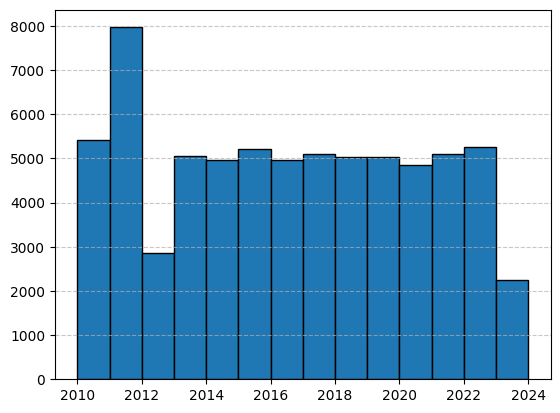

In [ ]:
plt.grid(axis='y', linestyle='--', alpha=0.7)
bins = sorted(df['Year'].unique()) + [df['Year'].max() + 1]
plt.hist(df['Year'], bins = bins, edgecolor="black")

Visualization of the amount of courses in each year-term.

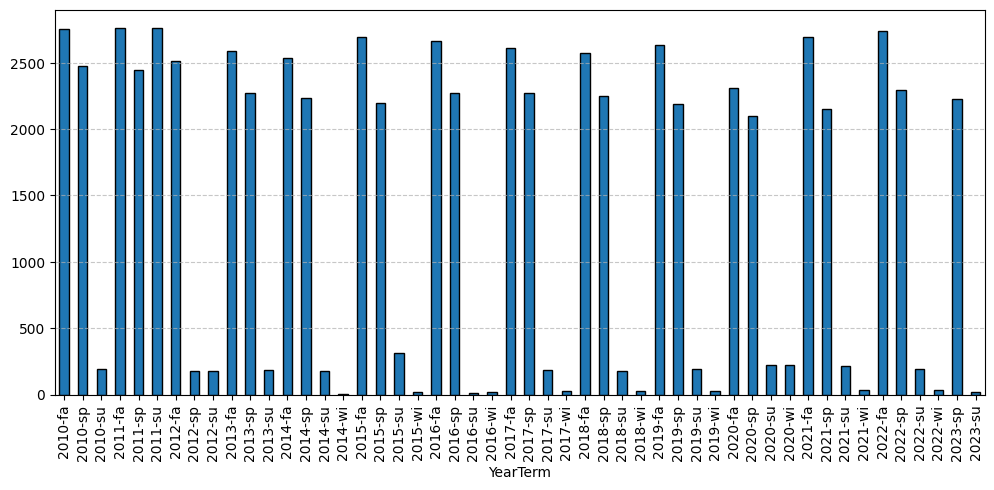

In [ ]:
plt.figure(figsize=(12, 5))
df['YearTerm'].value_counts().sort_index().plot(kind='bar', edgecolor="black")
plt.grid(axis='y', linestyle='--', alpha=0.7)

Visualization of the amount of courses per term.

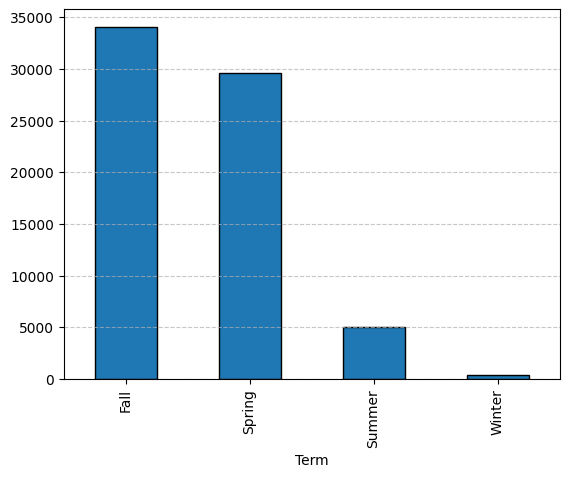

In [ ]:




# plt.hist(df['Term'], bins = len(df['Term'].unique()))
df['Term'].value_counts().sort_index().plot(kind='bar', edgecolor="black")
plt.grid(axis='y', linestyle='--', alpha=0.7)

Visualization of the distribution of course type.

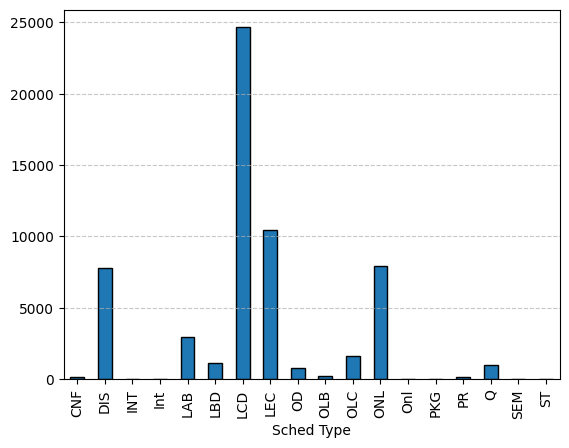

In [ ]:
df['Sched Type'].value_counts().sort_index().plot(kind='bar', edgecolor="black")
plt.grid(axis='y', linestyle='--', alpha=0.7)

Bias from large proportion of ONL classes: With the high distribution of ONL classes (online), we hypothesize that there may be bias in our model. Students' access to technology, internet quality, and a quiet study space can significantly affect their performance in online courses, and these factors often correlate with socioeconomic status. Therefore, including ONL classes in the same dataset with our in-person classes may bias our model, potentially even further perpetuating systemtic biases in our society.

Distribution of Course Number.

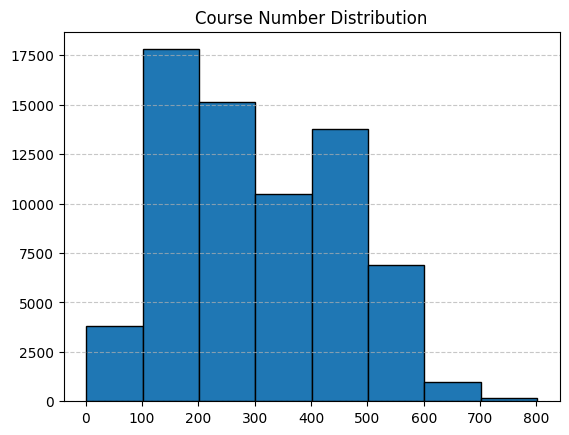

In [ ]:
max_num = df['Number'].max() // 100
bins = range(1, (max_num + 2) * 100, 100)
plt.hist(df['Number'], bins = bins, edgecolor="black");
plt.title("Course Number Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)

Find the distribution of course based on subjects

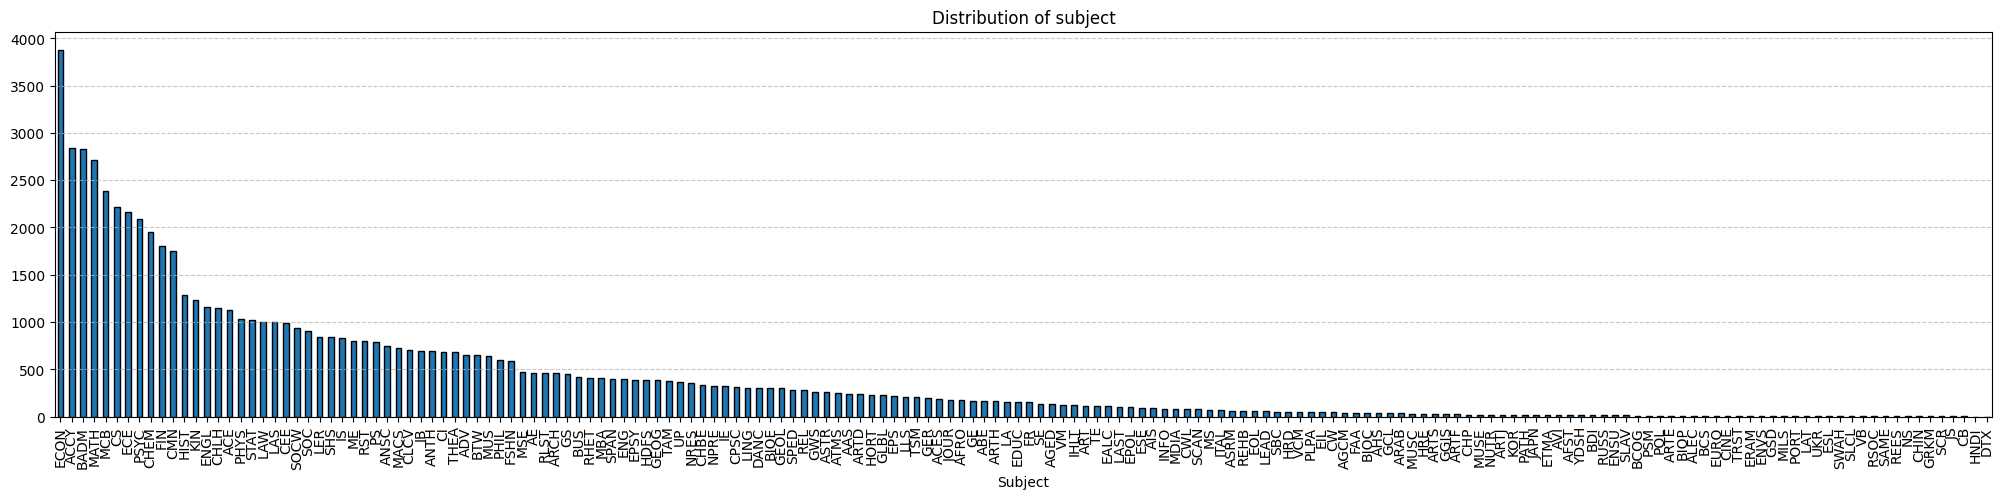

In [ ]:
plt.figure(figsize=(25,5))
df["Subject"].value_counts().sort_values(ascending=False)[:].plot(kind="bar", edgecolor="black")
plt.title("Distribution of subject")
plt.grid(axis='y', linestyle='--', alpha=0.7)

Find the distribution of grade

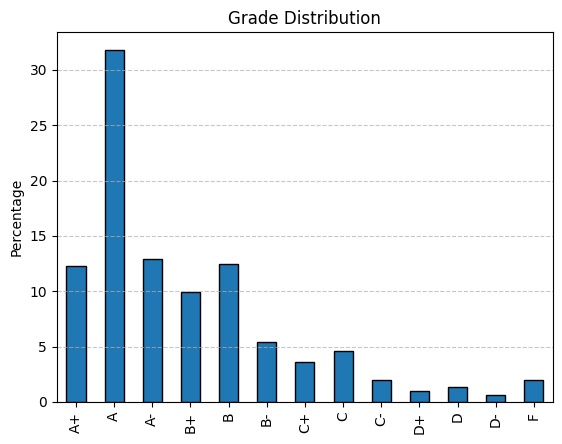

In [ ]:
grade_counts = df[['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']].sum()
total_counts = grade_counts.sum()
grade_counts = grade_counts / total_counts * 100
grade_counts.plot(kind='bar', edgecolor="black")
plt.title("Grade Distribution")
plt.ylabel("Percentage")
plt.grid(axis='y', linestyle='--', alpha=0.7)

## Data Limitations and Considerations
* Missing Data:
In general there is not much missing data in the current working dataset. Among all different columns only the primary instructor has null values (177 out of 69069) Unlike numerical feature, where we could replace the missing data with mean, median or mode, it does not make much sense to replace the instructor of a particular course with the "mode" of the instructors. The better way should be creating a new category "NA" for all courses that have primary instructor missing.
* Imbalanced Data:
From the distribution of grades we can see that the current dataset has much more datapoints between A and B (about 75%). Such imbalance might cause the model to predict in favor of these higher scores. To handle this properly, we might need to figure out the expected distribution of the grade and then calculate the bias of each grade category to see if such distribution is really imbalanced. In addition, instead of using accuracy we can thinking of using metrics like precision-recall, F1 score and AUC to better access our model
* Sparse Data:
There is not much data in the lower range of grades. This imbalance can cause the model to overfit on the passing grades, resulting in high accuracy for average and high-performing students but poor predictive accuracy for those at risk of failing. Additionally, the model may misclassify borderline cases due to insufficient data on the specific characteristics that lead to lower grades, further reducing its effectiveness in early intervention for struggling students.

# Baseline Learning
Predict Average GPA based on Subject, Course Level, Sched Type, Primary Instructor, and Class Size.

Data Pre-Processing

In [ ]:
# Generate course level
df['Course Level'] = (df['Number']/100).astype(int)
df.head()

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C-,D+,D,D-,F,W,Primary Instructor,Class Size,Average GPA,Course Level
0,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,11,5,...,0,0,0,0,1,0,"Shin, Jeongsu",22,3.530909,1
1,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,17,2,...,0,0,0,0,0,1,"Shin, Jeongsu",23,3.797391,1
2,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,13,2,...,1,0,0,0,1,0,"Lee, Sabrina Y",21,3.476667,1
3,2023,Spring,2023-sp,AAS,200,U.S. Race and Empire,LCD,6,15,5,...,0,0,1,0,1,0,"Sawada, Emilia",33,3.606364,2
4,2023,Spring,2023-sp,AAS,215,US Citizenship Comparatively,LCD,16,12,2,...,0,0,0,0,0,0,"Kwon, Soo Ah",33,3.889091,2


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One hot encoding for categorical data
ohe = OneHotEncoder(handle_unknown='ignore')
X = ohe.fit_transform(df[['Subject', 'Course Level', 'Sched Type', 'Primary Instructor']]).toarray()

In [ ]:
# Adding Class Size to input features
from scipy.sparse import hstack,coo_matrix
class_size = coo_matrix(df['Class Size'].values.reshape(-1,1))
X = hstack((X, class_size), format = 'csr')

In [ ]:
y = df['Average GPA'].values

Split training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# save files to npy and npz files for future use
import scipy as sp
# sp.sparse.save_npz('X_train.npz', X_train)
# sp.sparse.save_npz('X_test.npz', X_test)
# np.save('y_train.npy', y_train)
# np.save('y_test.npy', y_test)


Fit Linear Regression

In [ ]:
def getfile(file_id, file_name, sparse = True):
    url = f"https://drive.google.com/uc?export=download&id={file_id}"
    gdown.download(url, file_name, quiet=False)

    if sparse:
        return sp.sparse.load_npz(file_name)
    else:
        return np.load(file_name)

In [ ]:
X_train = getfile("1YAeSik5dGe6C305rQ0_17hAYvIn__COz", "X_train.npz")
X_test = getfile("1f-mmO0H3Ae__rlmEoMV4geqCPb1MR7DK", "X_test.npz")
y_train = getfile("1buuU_L6aY3EyjGLQeU8YtdRETZ0IITHS", "y_train.npy", sparse = False)
y_test = getfile("1avcmNfjji9Rp6VkY2PKBXj0VTCwe-zqI", "y_test.npy", sparse = False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1YAeSik5dGe6C305rQ0_17hAYvIn__COz
To: /content/X_train.npz
100%|██████████| 229k/229k [00:00<00:00, 62.7MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1f-mmO0H3Ae__rlmEoMV4geqCPb1MR7DK
To: /content/X_test.npz
100%|██████████| 463k/463k [00:00<00:00, 80.3MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1buuU_L6aY3EyjGLQeU8YtdRETZ0IITHS
To: /content/y_train.npy
100%|██████████| 182k/182k [00:00<00:00, 57.3MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1avcmNfjji9Rp6VkY2PKBXj0VTCwe-zqI
To: /content/y_test.npy
100%|██████████| 370k/370k [00:00<00:00, 77.2MB/s]


In [ ]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
print(f"Baseline Model R-squared score: {model.score(X_test, y_test)}")

Baseline Model R-squared score: 0.48309788979826496
